In [2]:
import pandas as pd
df=pd.read_csv('C:\\Users\\Mahitha\\Desktop\\delays.csv')
df

,datetime,id,carrier,date,connection,arrival,delay,name
0,2022-05-16 00:00:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:31,162 min,Warszawa Zachodnia
1,2022-05-16 00:00:00,91888/9 (102),Koleje Mazowieckie,2022-05-16,Siedlce - Warszawa Zachodnia,00:15,0 min,Warszawa Zachodnia
2,2022-05-16 00:00:00,21644/5 (102),Koleje Mazowieckie,2022-05-16,Radom Główny - Warszawa Wschodnia,00:29,0 min,Warszawa Zachodnia
3,2022-05-16 00:00:00,19300/1 (102),Koleje Mazowieckie,2022-05-16,Warszawa Wschodnia - Grodzisk Mazowiecki,00:34,0 min,Warszawa Zachodnia
4,2022-05-16 00:00:00,38170/1 (102) USTRONIE,PKP Intercity,2022-05-16,Kraków Główny - Kołobrzeg,00:55,0 min,Warszawa Zachodnia
...,...,...,...,...,...,...,...,...
3718165,2022-05-29 23:55:00,53172/3 ROZEWIE,PKP Intercity,2022-05-30,Gdynia Główna - Kraków Główny,07:25,4 min,Mysłowice
3718166,2022-05-29 23:55:00,15417,Koleje Mazowieckie,2022-05-30,Warszawa Zachodnia peron 9 - Mława,00:23,0 min,Nowy Dwór Mazowiecki
3718167,2022-05-29 23:55:00,38170/1 USTRONIE,PKP Intercity,2022-05-30,Kraków Główny - Kołobrzeg,02:16,0 min,Nowy Dwór Mazowiecki
3718168,2022-05-29 23:55:00,83170/1 USTRONIE,PKP Intercity,2022-05-30,Kołobrzeg - Kraków Główny,03:17,6 min,Nowy Dwór Mazowiecki


<AxesSubplot:xlabel='delay'>

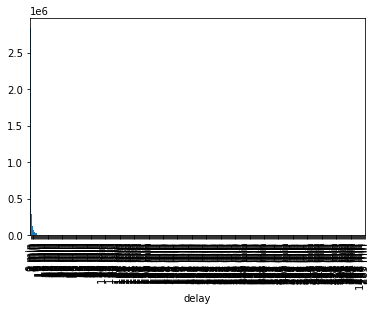

In [3]:
df['delay'].value_counts().plot(kind='bar')

In [4]:
def get_delays_by_date(dataframe, input_date):
    """
    Function to get the train names and their delay times for a specific date.

    :param dataframe: Pandas DataFrame containing the train delay data
    :param input_date: The date for which to check the delays (format: YYYY-MM-DD)
    :return: A DataFrame with train names and their delay times for the given date
    """
    # Filter the dataframe for the given date
    filtered_df = dataframe[dataframe['date'] == input_date]

    # Selecting relevant columns
    result_df = filtered_df[['name', 'delay']].copy()

    return result_df

# Load the data from the CSV file
file_path = 'C:\\Users\\Mahitha\\Desktop\\delays.csv'  # Replace with the path to your CSV file
train_delays_df = pd.read_csv(file_path)

# Example usage
input_date = '2022-05-29'  # Replace this with your desired date
delays_on_date = get_delays_by_date(train_delays_df, input_date)
print(delays_on_date.tail())  # Prints the first few rows of the result

                      name    delay
3718142    Katowice Brynów   66 min
3718144  Wrocław Mikołajów   34 min
3718145        Częstochowa  128 min
3718149     Szczecin Dąbie   51 min
3718156          Zawiercie    7 min


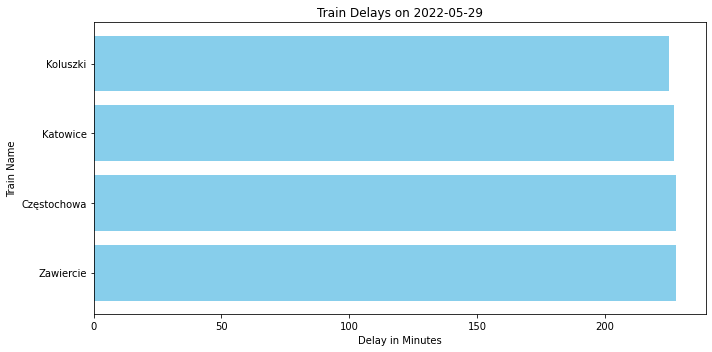

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'C:\\Users\\Mahitha\\Desktop\\delays.csv'
train_delays_df = pd.read_csv(file_path)

def get_delays_by_date(dataframe, input_date, max_trains=10):
    """
    Function to get the train names and their delay times for a specific date.
    """
    # Filter the dataframe for the given date
    filtered_df = dataframe[dataframe['date'] == input_date]

    # Selecting relevant columns and removing ' min' from delay for conversion to int
    result_df = filtered_df[['name', 'delay']].copy()
    result_df['delay'] = result_df['delay'].str.replace(' min', '').astype(int)

    # Sort and limit to max_trains
    result_df = result_df.sort_values('delay', ascending=False).head(max_trains)

    return result_df

def plot_delays(dataframe):
    """
    Function to plot the delays of trains.
    """
    plt.figure(figsize=(10, len(dataframe) / 2))  # Adjusting figure size
    plt.barh(dataframe['name'], dataframe['delay'], color='skyblue')
    plt.xlabel('Delay in Minutes')
    plt.ylabel('Train Name')
    plt.title('Train Delays on ' + input_date)
    plt.tight_layout()
    plt.show()

# Example usage
input_date = '2022-05-29'  # Replace this with your desired date
delays_on_date = get_delays_by_date(train_delays_df, input_date)
plot_delays(delays_on_date)